# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [89]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:
#API URL 
url="http://api.openweathermap.org/data/2.5/weather"
#Initial creation of API parameters
location=""
parameters= { 
              "q": location,
              "appid": api_key,
              "units": "imperial"
            }

#Name Dataframe columns
dataframe_columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

#Create empty data frame
cities_df=pd.DataFrame(columns=dataframe_columns)

#reset counter
i=1

print(f"Beginning Data Retrieval\n",     
      f"-----------------------------")

#Loop to pull API data
for city in cities:
    #assign city to the API parameters
    parameters["q"]=city
    #Print Processessing, increment counter, and call API
    print(f"Processing record {i} of {len(cities)} | {city}")
    i+=1
    city_data=requests.get(url,params=parameters)
    #make sure there's a valid response
    if city_data.status_code == 200:
        #This try drops anything that has a null field so I don't have to later
        try:
            #Get the needed values from the API and add them to a dict
            city_json=city_data.json()
            cityname=city_json["name"] 
            cloudiness=city_json["clouds"]["all"] 
            country=city_json["sys"]["country"]
            epoch_time=city_json["dt"]        
            humidity=city_json["main"]["humidity"]     
            lat=city_json["coord"]["lat"]          
            lon=city_json["coord"]["lon"]           
            max_temp=city_json["main"]["temp_max"] 
            wind_speed=city_json["wind"]["speed"]
            city_dict={ "City": cityname, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": epoch_time, 
                        "Humidity":humidity, 
                        "Lat":lat, 
                        "Lng": lon, 
                        "Max Temp":max_temp, 
                        "Wind Speed":wind_speed}
            #Append the dict as a row to the dataframe
            cities_df=cities_df.append(city_dict, ignore_index=True)
        except:
            print(f"Data missing skipping {city}")
    else:
        print("City not found. Skipping...")
   
print(
    f"-----------------------------\n"
    f"Data Retrieval Complete\n"   
    f"-----------------------------\n"
    )


Beginning Data Retrieval
 -----------------------------
Processing record 1 of 612 | filadelfia
Processing record 2 of 612 | silifke
Processing record 3 of 612 | bafoulabe
Processing record 4 of 612 | barrow
Processing record 5 of 612 | qaanaaq
Processing record 6 of 612 | canton
Processing record 7 of 612 | lavrentiya
Processing record 8 of 612 | rikitea
Processing record 9 of 612 | victoria
Processing record 10 of 612 | dekoa
City not found. Skipping...
Processing record 11 of 612 | new norfolk
Processing record 12 of 612 | bathsheba
Processing record 13 of 612 | ushuaia
Processing record 14 of 612 | bluff
Processing record 15 of 612 | east london
Processing record 16 of 612 | tasiilaq
Processing record 17 of 612 | albany
Processing record 18 of 612 | vila franca do campo
Processing record 19 of 612 | isangel
Processing record 20 of 612 | cherskiy
Processing record 21 of 612 | mataura
Processing record 22 of 612 | avarua
Processing record 23 of 612 | nanortalik
Processing record 24 o

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [91]:
cities_df.to_csv("city_data.csv")
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
City          546 non-null object
Cloudiness    546 non-null object
Country       546 non-null object
Date          546 non-null object
Humidity      546 non-null object
Lat           546 non-null float64
Lng           546 non-null float64
Max Temp      546 non-null float64
Wind Speed    546 non-null float64
dtypes: float64(4), object(5)
memory usage: 38.5+ KB


In [112]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Filadelfia,92,PY,1554161269,80,-22.35,-60.04,81.49,11.74
1,Silifke,8,TR,1554161269,94,36.38,33.93,43.42,2.35
2,Bafoulabe,0,ML,1554161269,47,13.81,-10.83,79.42,5.03
3,Barrow,0,AR,1554161269,50,-38.31,-60.23,73.57,11.74
4,Qaanaaq,0,GL,1554161269,74,77.48,-69.36,-3.56,7.49


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

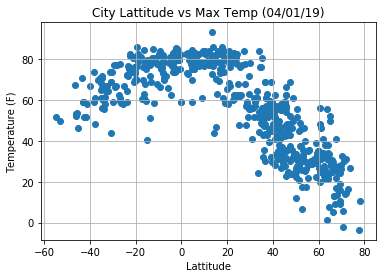

In [128]:
#Funtion to add labels and formatting
def plot_format(title, y_label, timestamp ):
    date=time.strftime("%m/%d/%y",time.localtime(timestamp))
    plt.xlabel("Lattitude")
    plt.ylabel(y_label)
    plt.title(f"{title} ({date})")
    plt.grid(b=True)


#I'm going to use the date of the first request to be the date on the graph
graph_date=cities_df["Date"][0]
    
plt.scatter(cities_df["Lat"], cities_df["Max Temp"])

plot_format("City Lattitude vs Max Temp","Temperature (F)",graph_date)


#### Latitude vs. Humidity Plot

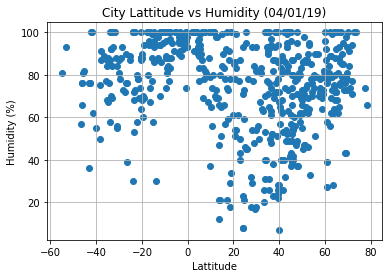

In [132]:
# Handle humidity outliers and drop humidity over 100
humidity_df=cities_df.loc[cities_df["Humidity"] <= 100]

# Plot the graph
plt.scatter(humidity_df["Lat"], humidity_df["Humidity"])

# Format the graph
plot_format("City Lattitude vs Humidity","Humidity (%)",graph_date)

#### Latitude vs. Cloudiness Plot

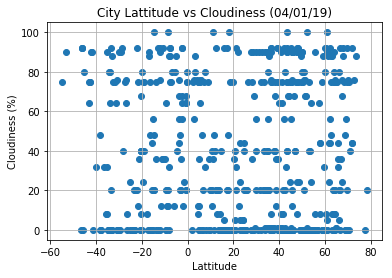

In [130]:
# I didn't seem to have any cloudiness outliers, so I didn't make logic to drop those
#plot the graph
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"])
#format the graph
plot_format("City Lattitude vs Cloudiness","Cloudiness (%)",graph_date)

#### Latitude vs. Wind Speed Plot

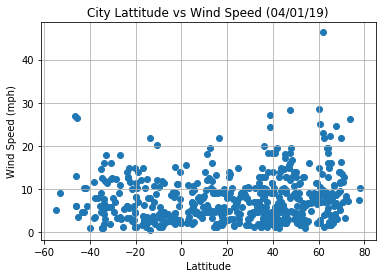

In [131]:
#plot the graph
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"])
#format the graph
plot_format("City Lattitude vs Wind Speed","Wind Speed (mph)",graph_date)

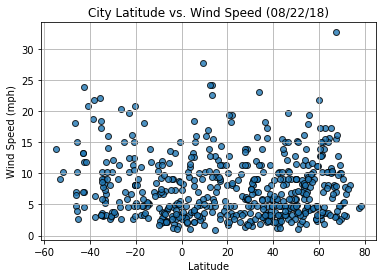

In [9]:
# Sample of format